In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

3 question 
- which month people use to visit most 
- which factor affect price
- predicting house price

In [13]:
cal = pd.read_csv('calendar.csv.zip')
lst = pd.read_csv('listings.csv.zip')
rev = pd.read_csv('reviews.csv.zip')


In [14]:
lst.shape

(3585, 95)

In [15]:
null_col =lst.loc[:,list(lst.loc[:,lst.isnull().any()].columns)]
null_col.isnull().sum()/(len(lst))*100

summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.083682
bathrooms  

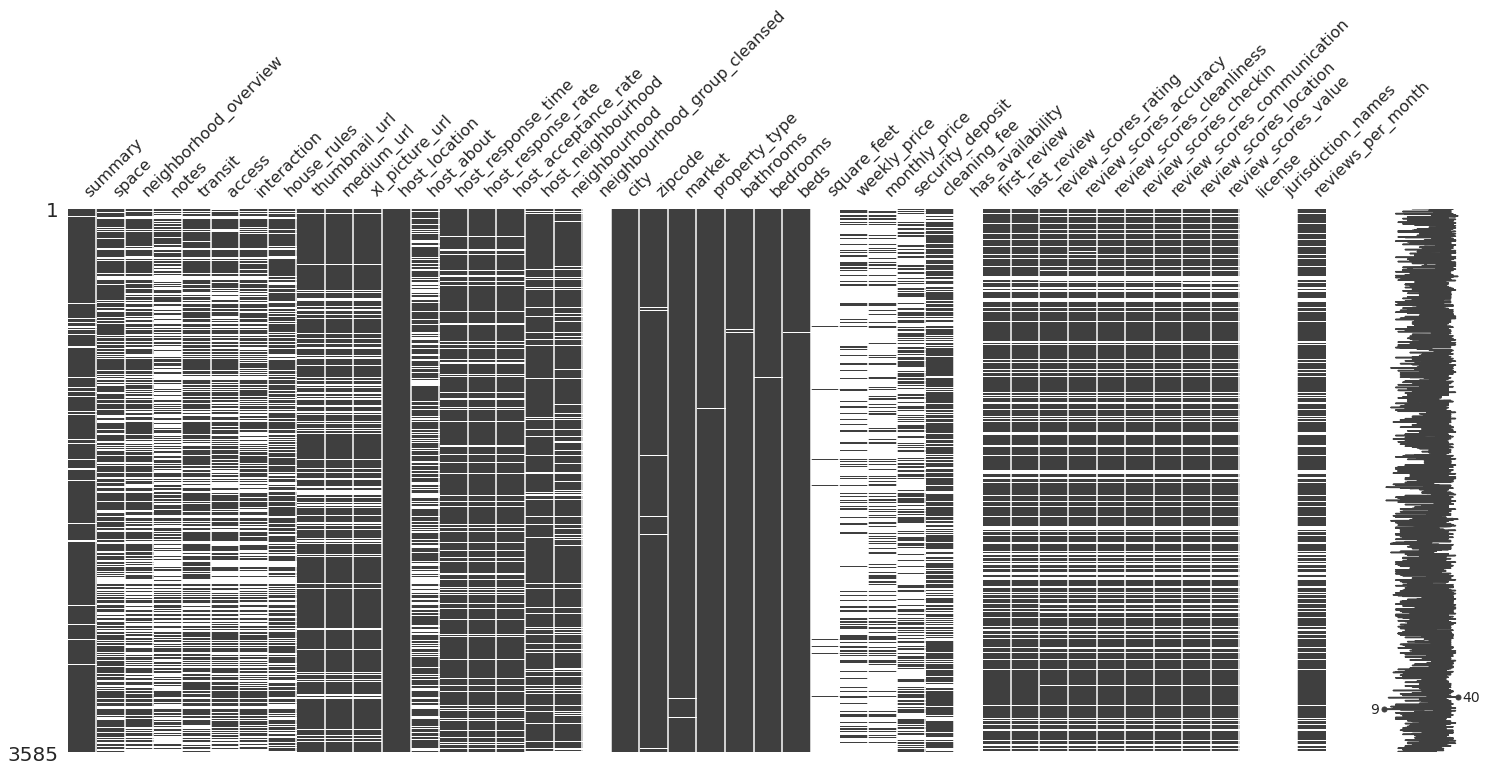

In [ ]:
import missingno
df = lst.columns[lst.isnull().any()].tolist()
missingno.matrix(lst[df])

In [ ]:
lst['price'].isnull().sum()

0

There are a lot of column with missing value but currently we will ignore that
At least our target is not null

In [ ]:
#convert price to number 
lst['price']=lst['price'].str.replace(',','').str.replace('$','').astype('float')

<ipython-input-102-ed5b4b956c0c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lst['price']=lst['price'].str.replace(',','').str.replace('$','').astype('float')


We are interest to see the distribution of neighbor in airbnb so let just create a bar plotto display the number of neighbor cities

In [ ]:
neighbor.index

Index(['Allston-Brighton', 'Jamaica Plain', 'South End', 'Back Bay',
       'Fenway/Kenmore', 'South Boston', 'Dorchester', 'Beacon Hill',
       'North End', 'East Boston', 'Roxbury', 'Mission Hill', 'Charlestown',
       'Chinatown', 'West End', 'Roslindale', 'West Roxbury',
       'Theater District', 'Downtown Crossing', 'Hyde Park', 'Mattapan',
       'Financial District', 'Somerville', 'Downtown', 'Leather District',
       'Brookline', 'Cambridge', 'Chestnut Hill', 'Government Center',
       'Harvard Square'],
      dtype='object')

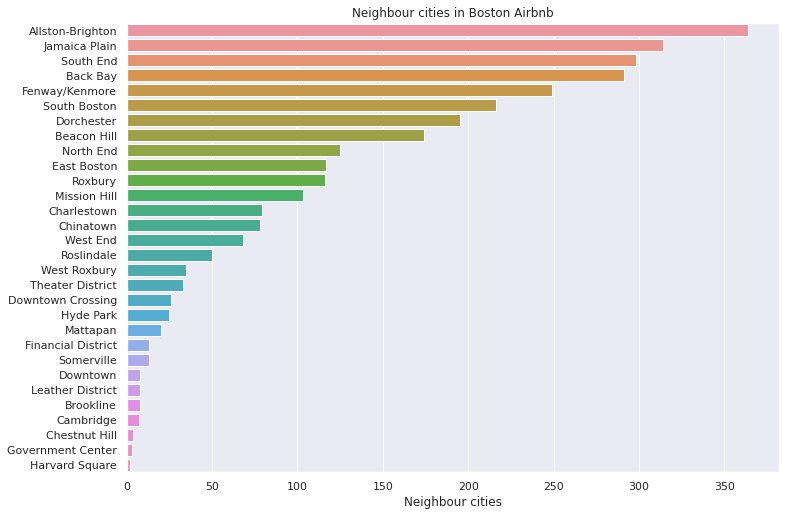

In [ ]:
neighbor = lst['neighbourhood'].value_counts()
sns.barplot(y=neighbor.index, x=neighbor)
plt.title('Neighbour cities in Boston Airbnb')
plt.xlabel('Neighbour cities');

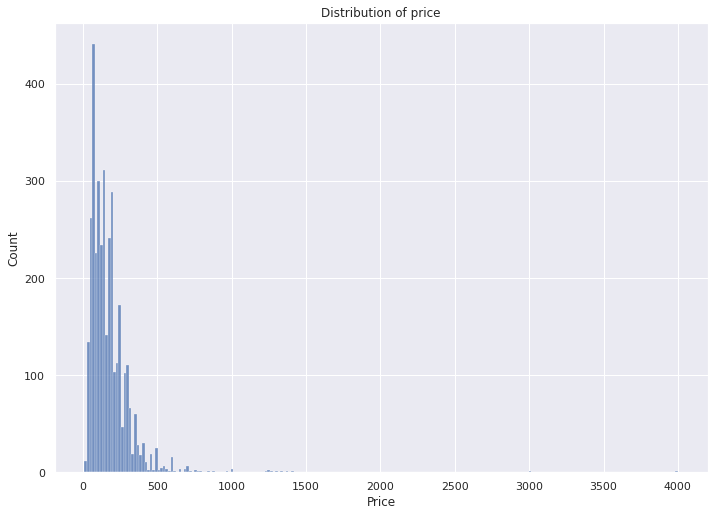

In [ ]:
#Let's look at price range and distribution

sns.histplot(lst['price'])
plt.title('Distribution of price')
plt.xlabel('Price');

From a data scietist perspective. it is clearly that our data has an outlier  however, I'm not a house expert so I will not delete that to make our data unbias, who know maybe there is a luxury 6 stars hotel with 4000$ per room actually existed

In [ ]:
#covenrt to date time data
rev['date'] = pd.to_datetime(rev.date)  
month = rev['date'].dt.month 
rev['Month'] = month

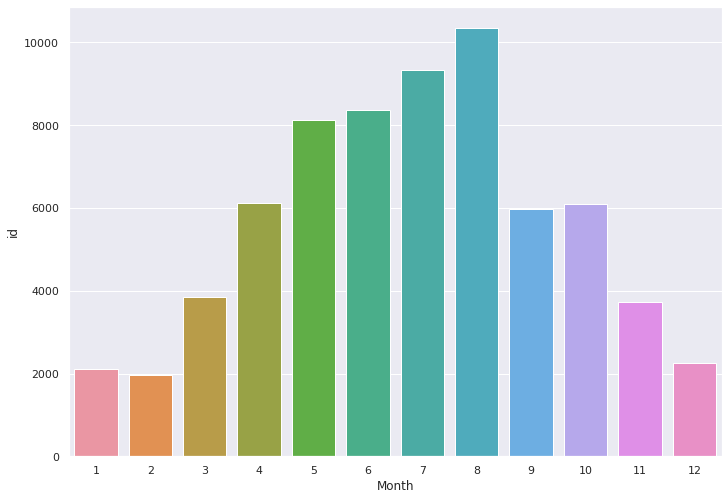

In [ ]:
Month = rev.groupby('Month').agg('count')['id'].sort_values(ascending=False).to_frame().reset_index()
sns.barplot(data=Month,x= 'Month', y='id' )

Linear Regression to predict house price

In [ ]:
num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
              'guests_included', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

In [ ]:
cat = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 'property_type', 'is_location_exact']
data = lst.select_dtypes(include=['int64', 'float64'])[num]
data[cat] = lst[cat]
price = data.copy()
price = price.dropna()    # drop na 
price = pd.get_dummies(price)  # create dummy variable

In [ ]:
# Split data: to train and test 

y = price['price']
X = price.drop('price',  axis =1 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [ ]:
X_train

,latitude,longitude,accommodates,bedrooms,bathrooms,beds,guests_included,availability_30,availability_60,availability_90,...,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,is_location_exact_f,is_location_exact_t
1174,42.346433,-71.070916,2,1.0,1.0,1.0,2,2,9,31,...,0,0,0,0,0,0,0,0,0,1
422,42.334678,-71.102513,4,2.0,1.0,2.0,1,29,59,89,...,0,0,0,0,0,0,0,0,0,1
1933,42.360520,-71.064014,3,1.0,1.0,2.0,1,0,6,9,...,0,0,0,0,0,0,0,0,0,1
368,42.310009,-71.101764,2,1.0,1.0,1.0,2,2,8,34,...,0,0,0,0,0,0,0,0,0,1
1998,42.356681,-71.071558,2,1.0,1.0,1.0,1,13,40,59,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,42.367098,-71.033349,3,0.0,1.0,2.0,1,0,0,7,...,0,0,0,0,0,0,0,0,0,1
59,42.316912,-71.113025,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1109,42.344032,-71.074080,4,2.0,2.5,2.0,1,29,59,89,...,0,0,0,1,0,0,0,0,0,1
2798,42.301693,-71.062637,4,1.0,2.0,1.0,1,0,13,43,...,0,0,0,1,0,0,0,0,0,1


In [ ]:

!pip install lightgbm 
import lightgbm as lgb


params = {
    'task': 'train', 
    'boosting': 'gbdt',        # parameter settings
    'objective': 'regression',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'metric': {'l2','l1'},
    'verbose': -1,
    'max_depth' :8
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

y_preds = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_preds)
rmse = mse**(0.5)
print(r2_score(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[1]	valid_0's l1: 81.3346	valid_0's l2: 13359.8
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 76.3976	valid_0's l2: 12026.4
[3]	valid_0's l1: 72.1046	valid_0's l2: 10940
[4]	valid_0's l1: 68.4273	valid_0's l2: 10069.2
[5]	valid_0's l1: 65.0509	valid_0's l2: 9296.12
[6]	valid_0's l1: 61.8165	valid_0's l2: 8514.7
[7]	valid_0's l1: 59.3336	valid_0's l2: 8009
[8]	valid_0's l1: 56.9961	valid_0's l2: 7544.07
[9]	valid_0's l1: 55.0131	valid_0's l2: 7180.37
[10]	valid_0's l1: 53.2889	valid_0's l2: 6860.98
[11]	valid_0's l1: 51.6393	valid_0's l2: 6526.39
[12]	valid_0's l1: 50.422	valid_0's l2: 6309.45
[13]	valid_0's l1: 49.1714	valid_0's l2: 6115.18
[14]	valid_0's l1: 48.2393	valid_0's l2: 5954.76
[15]	valid_0's l1: 47.2453	valid_0's l2: 5772.28
[16]	valid_0's l1: 46.4953	valid_0's l2: 5661.3
[17]	valid_0's l1: 45.6526	valid_0's l2: 5526.06
[18]	valid_0's l1: 45.0

In [ ]:
print(r2_score(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))

0.6863002065048688
4674.4973804578085
41.25616857149495


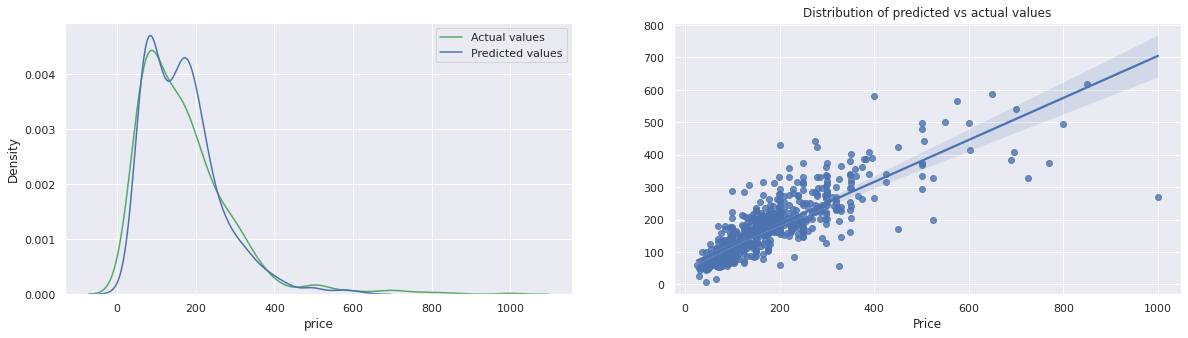

In [ ]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sns.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

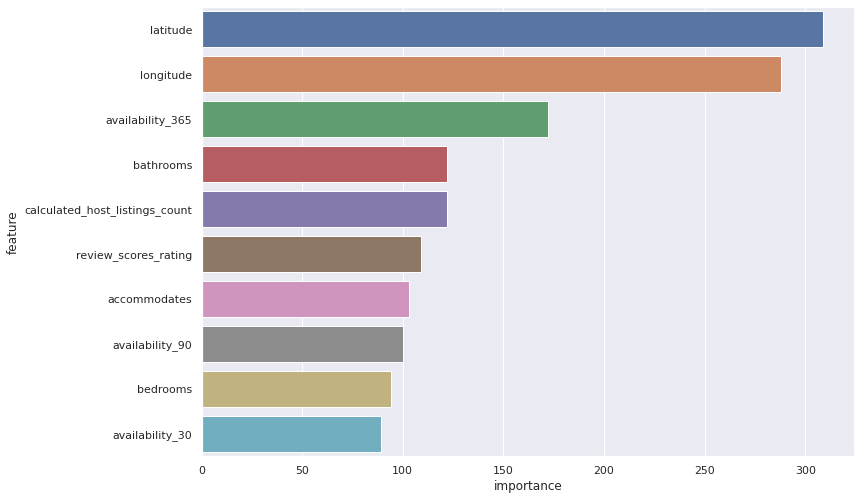

In [ ]:
df_feature_importance = (
    pd.DataFrame({
        'feature': model.feature_name(),
        'importance': model.feature_importance(),
    })
    .sort_values('importance', ascending=False)
)
top10_feature=df_feature_importance.iloc[:10,:]
sns.barplot( x=top10_feature['importance'],y=top10_feature['feature'])